In [1]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample

## Data preparation
### Loading data

In [2]:
data_stellar = pd.read_csv("./star_classification.csv")
data_stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Data analysis

In [4]:
data_stellar['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

We can see that the 3 classes are unbalanced such that the distribution is as follows: 
- GALAXY : 59.445%
- QSO: 18.961%
- STAR : 21.594%.

In [6]:
data_stellar.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

We can see that there are no missing values in our dataset and therefore we can directly visualize this dataset

In [7]:
data_stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


On va maintenant passer à une rapide visualisation des données. On commence par observer la distribution des différentes variables 

In [3]:
columns_stellar = data_stellar.copy()
columns_stellar.drop(['class'], axis = 1, inplace=True)
columns = list(columns_stellar.columns)

In [4]:
columns.pop(0)

'obj_ID'

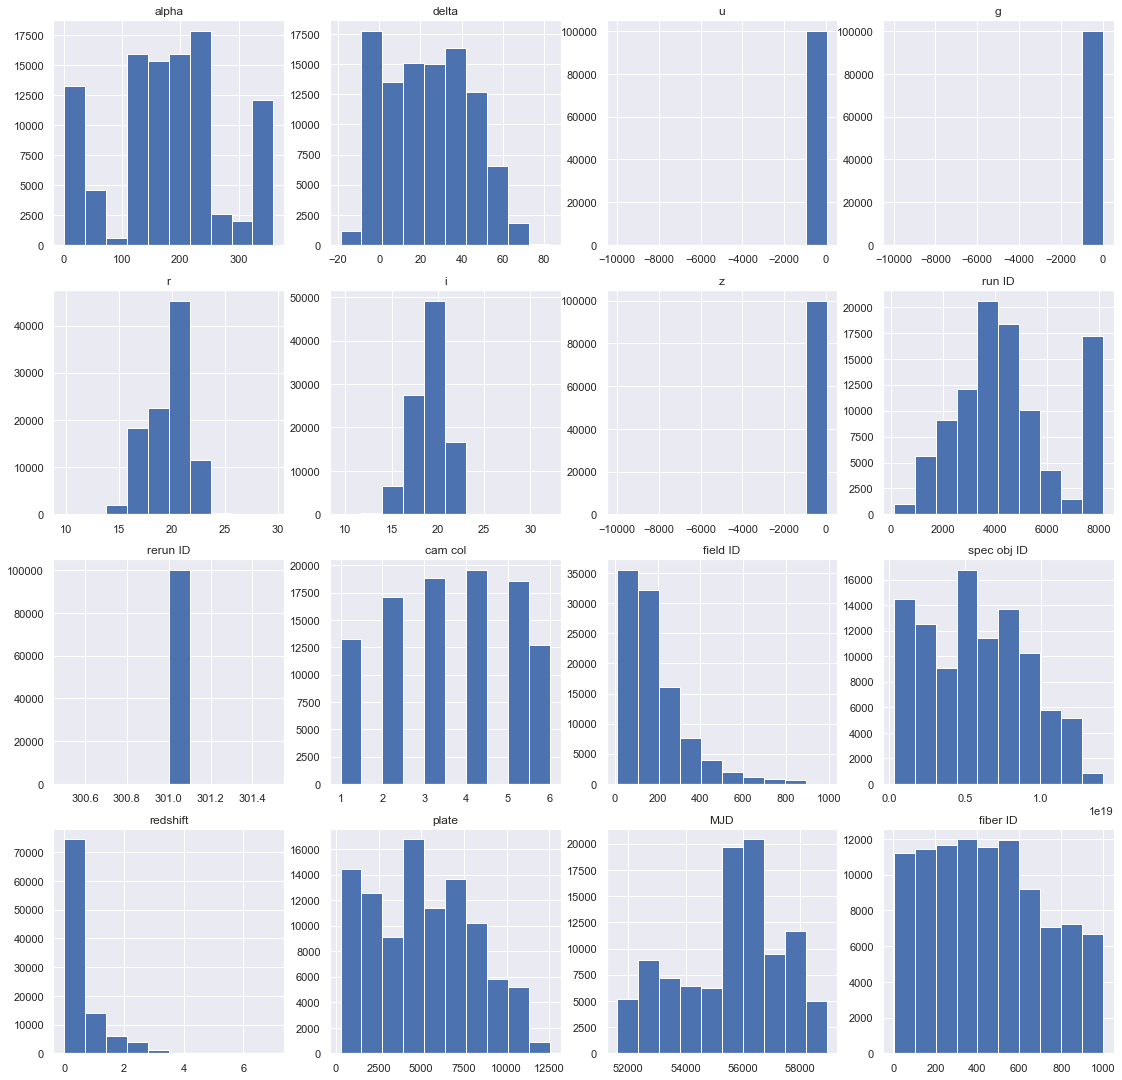

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(19,19))
index = 1
for column in columns :
    plt.subplot(4,4,index)
    plt.hist(data_stellar[column])
    plt.title(column.replace('_',' '))
    index +=1

We now observe the average distributions by class, making sure to use a normalized histogram since the classes are highly unbalanced and thus to show the distribution efficiently

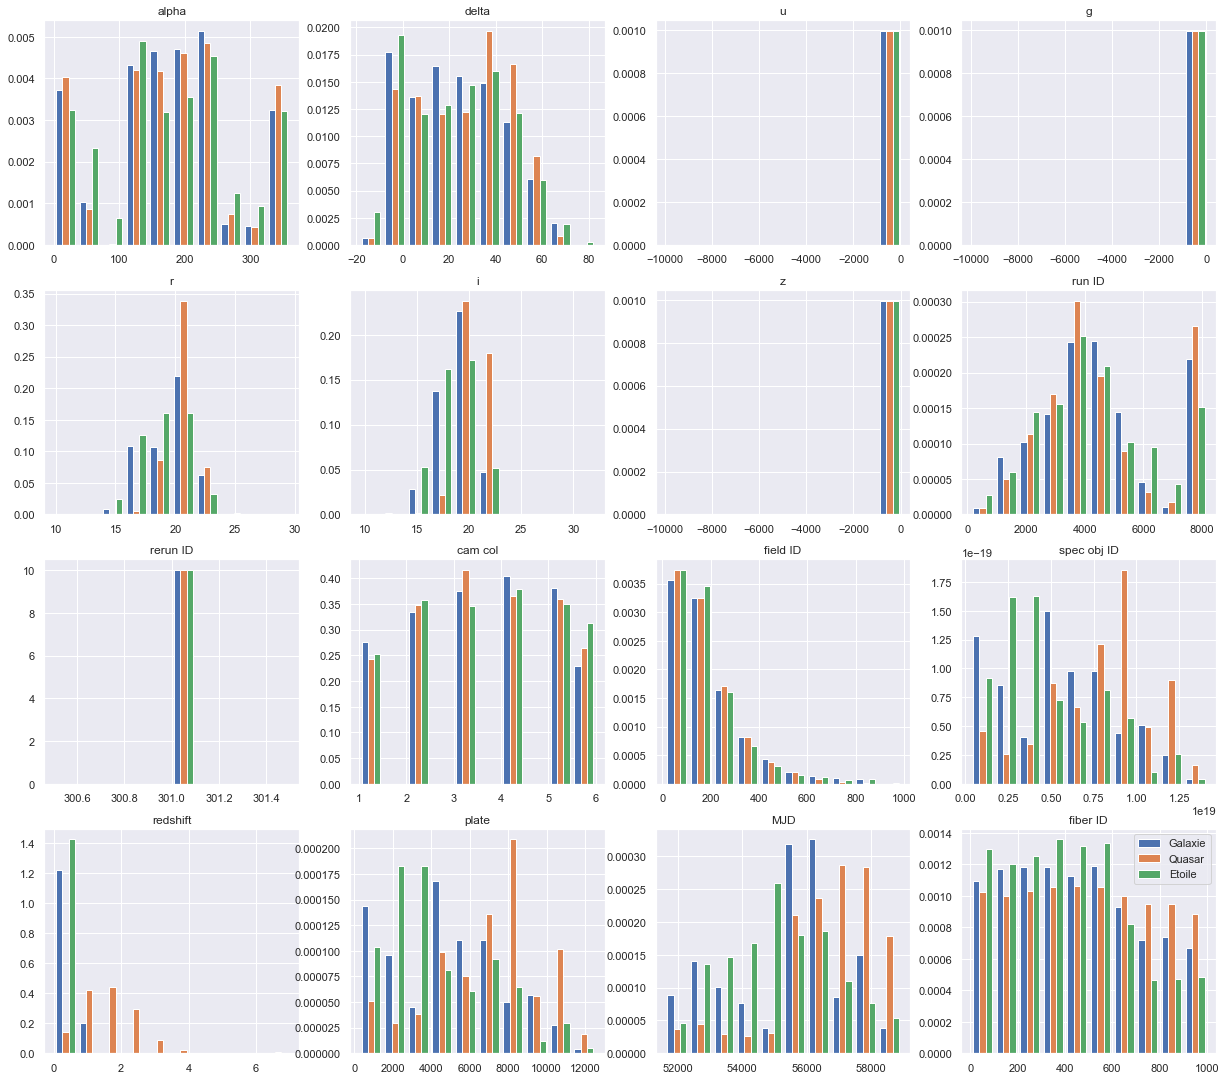

In [18]:
plt.figure(figsize=(21,19))
index = 1
for column in columns :
    plt.subplot(4,4,index)
    plt.hist([
        data_stellar[data_stellar["class"]=='GALAXY'][column],
        data_stellar[data_stellar["class"]=='QSO'][column],
        data_stellar[data_stellar["class"]=='STAR'][column],
        ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
    plt.title(column.replace('_',' '))
    index +=1
plt.legend()

Thus we can see that several variables are not significant in their classification: 
- Rerun ID
- U
- G 
- Z

So we will analyze later the interest of these variables and their removal if it adds quality to the classification. We now analyze the distributions of each 

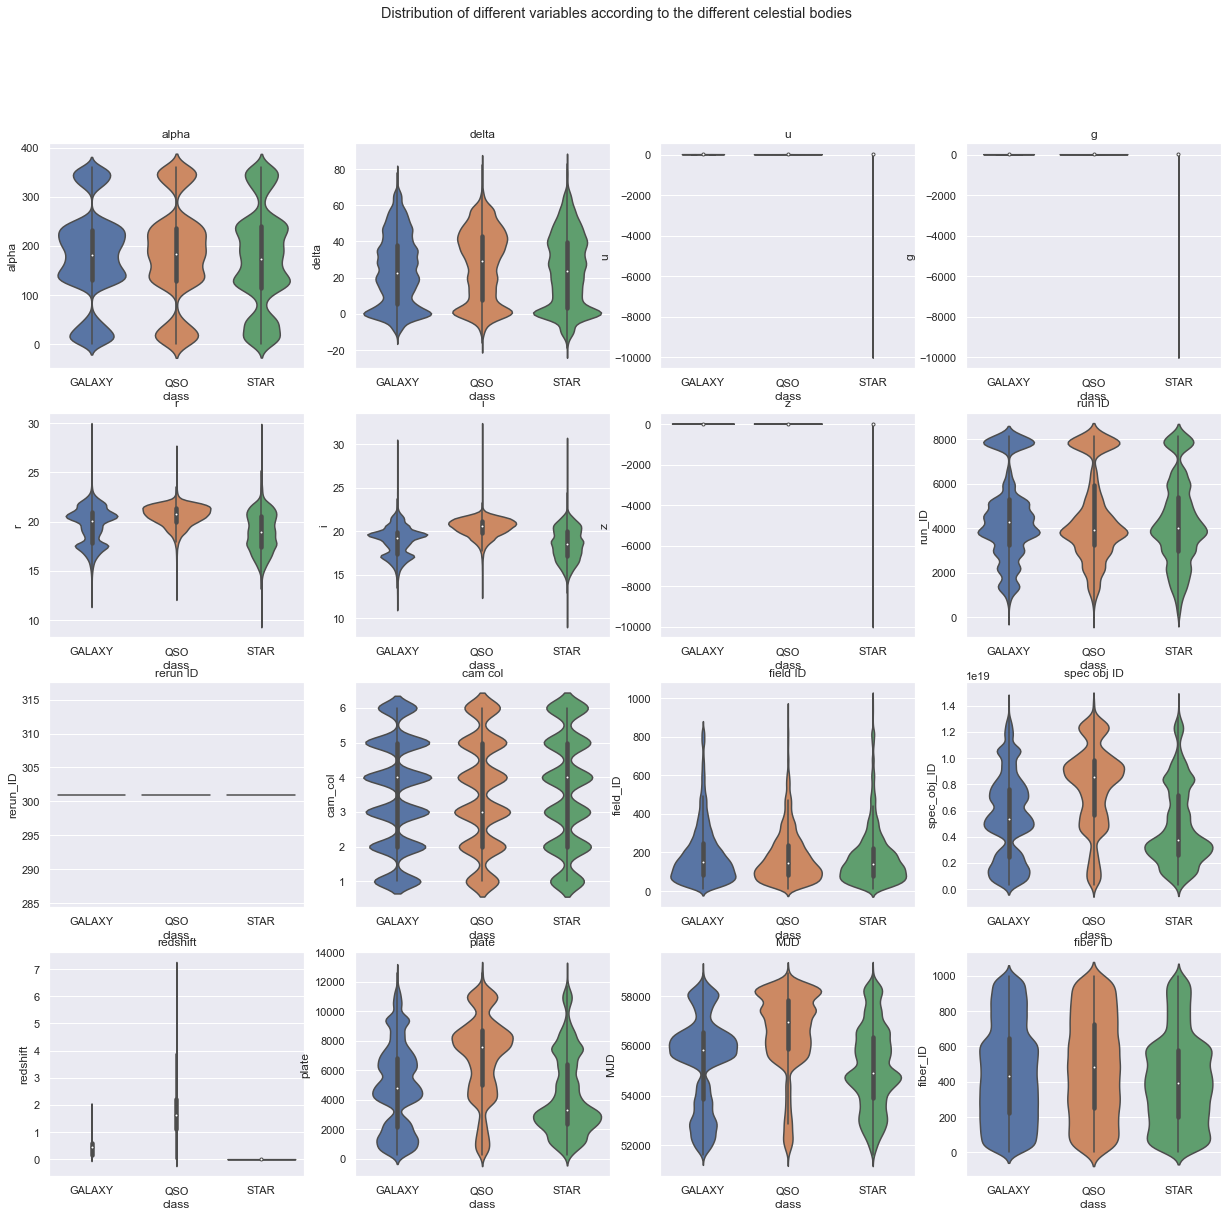

In [29]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(4, 4, figsize=(21,19))
fig.suptitle('Distribution of different variables according to the different celestial bodies')

i = 0
for column in columns :
    sns.violinplot(ax=axes[int(i/4), i%4],data=data_stellar ,x='class', y=column)
    axes[int(i/4), i%4].set_title(column.replace('_',' '))
    i += 1

We find the same remarks as before, the variables u/g/z/rerun_id are not representative enough of the classes to allow us to differentiate them
### Preparation of the data
To do this we will go through two steps: 
- We remove superfluous variables 
- We normalize our data

In [5]:
data_stellar.drop(['rerun_ID', 'u', 'g', 'z', 'obj_ID'], inplace=True, axis=1)
data_stellar.head()

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,20.39501,19.16573,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,22.58444,21.16812,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,20.60976,19.34857,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,21.61162,20.50454,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,16.49747,15.97711,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
features_stellar = data_stellar.copy()
etiq = features_stellar['class']
features_stellar.drop(['class'], inplace=True, axis = 1)
features_stellar.head()

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,20.39501,19.16573,3606,2,79,6.543777e+18,0.634794,5812,56354,171
1,144.826101,31.274185,22.58444,21.16812,4518,5,119,1.176014e+19,0.779136,10445,58158,427
2,142.188790,35.582444,20.60976,19.34857,3606,2,120,5.152200e+18,0.644195,4576,55592,299
3,338.741038,-0.402828,21.61162,20.50454,4192,3,214,1.030107e+19,0.932346,9149,58039,775
4,345.282593,21.183866,16.49747,15.97711,8102,3,137,6.891865e+18,0.116123,6121,56187,842


In [32]:
etiq.value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

We now proceed to the normalization of the parameters of our problem

In [7]:
features_stellar_scaled = StandardScaler().fit_transform(features_stellar)
features_stellar_scaled = pd.DataFrame(features_stellar_scaled)
features_stellar_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.434604,0.425529,0.403962,0.046007,-0.445535,-0.952553,-0.718947,0.228609,0.079557,0.228633,0.423203,-1.021342
1,-0.339921,0.363402,1.584406,1.185097,0.018646,0.937920,-0.450509,1.797912,0.277096,1.797924,1.420729,-0.081883
2,-0.367251,0.582713,0.519745,0.150019,-0.445535,-0.952553,-0.443798,-0.190037,0.092423,-0.190025,0.001854,-0.551612
3,1.669523,-1.249105,1.059904,0.807610,-0.147278,-0.322395,0.187031,1.358962,0.486770,1.358942,1.354927,1.195196
4,1.737310,-0.150242,-1.697421,-1.767887,1.842792,-0.322395,-0.329712,0.333328,-0.630267,0.333297,0.330860,1.441070


#### Subdivision into testing and training

In [8]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_stellar, etiq, test_size=0.3,random_state=23)
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(features_stellar_scaled, etiq, test_size=0.3,random_state=23)

In [35]:
fv_train.shape

(70000, 12)

### Classification
#### KNN

In [36]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

KNeighborsClassifier(n_neighbors=11, p=1)

Accuracy :  0.7094
F1-score KNN :  0.6131147587793583


Text(0.5, 1.0, 'Confusion matrix')

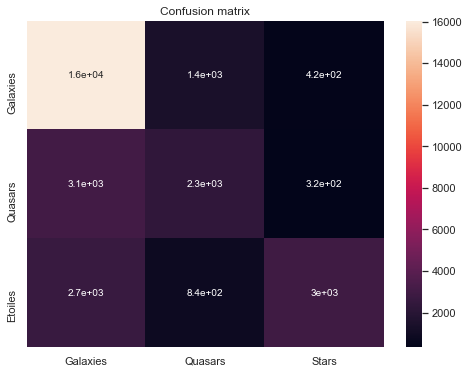

In [43]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score KNN : ",metrics.f1_score(etiq_test, yknn, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Stars"])
plt.title('Confusion matrix')

Avec les variables normalisées

In [40]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn_scaled=KNeighborsClassifier()
clf = GridSearchCV(knn_scaled, parameters)
clf.fit(fv_train_scaled,etiq_train)
knn_scaled=KNeighborsClassifier(**clf.best_params_)
knn_scaled.fit(fv_train_scaled,etiq_train)

KNeighborsClassifier(n_neighbors=3, p=1)

Accuracy :  0.9024666666666666
F1-score KNN :  0.8863331426424578


Text(0.5, 1.0, 'Confusion matrix')

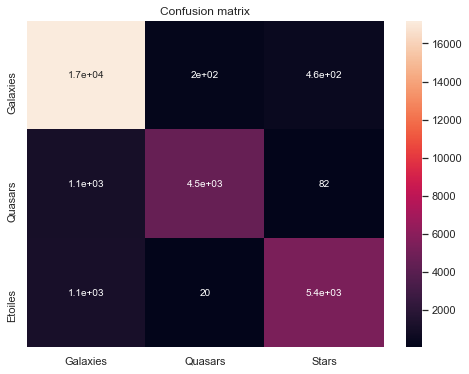

In [44]:
yknn_scaled=knn_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn_scaled))
print("F1-score KNN : ",metrics.f1_score(etiq_test, yknn_scaled, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_scaled), annot=True, annot_kws={"size": 10}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Stars"])
plt.title('Confusion matrix')

#### Random Forest

In [47]:
forrest = RandomForestClassifier(n_estimators = 300, max_features = 'log2', criterion = 'entropy', class_weight='balanced').fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest, average = "macro"))

Accuracy :  0.9736333333333334
F1-score :  0.9689486718800698


Text(0.5, 1.0, 'Confusion matrix')

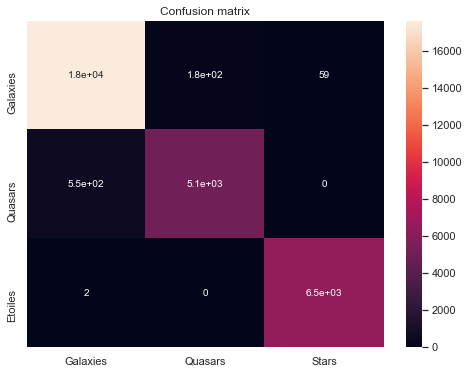

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Stars"])
plt.title('Confusion matrix')

With normalized features

In [46]:
forrest_scaled = RandomForestClassifier(n_estimators = 300, max_features = 'log2', criterion = 'entropy', class_weight='balanced').fit(fv_train_scaled,etiq_train)
yforrest_scaled = forrest_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest_scaled))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest_scaled, average = "macro"))

Accuracy :  0.9740666666666666
F1-score :  0.9694596011395872


This has almost no impact on the performance of the algorithm, proving the efficiency of the decision trees. So we have excellent results with Random Forrest, we add a variant of Random Forrest to see 

#### Extremely randomized tree

In [51]:
extra = ExtraTreesClassifier(n_estimators=1000, criterion='entropy', random_state=0, class_weight='balanced').fit(fv_train,etiq_train)
yextra = extra.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra))
print("F1-score : ",metrics.f1_score(etiq_test, yextra, average = "macro"))

Accuracy :  0.9649333333333333
F1-score :  0.9591248434322338


In [52]:
extra_scaled = ExtraTreesClassifier(n_estimators=1000, criterion='entropy', random_state=0, class_weight='balanced').fit(fv_train_scaled,etiq_train)
yextra_scaled = extra_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra_scaled))
print("F1-score : ",metrics.f1_score(etiq_test, yextra_scaled, average = "macro"))

Accuracy :  0.9651333333333333
F1-score :  0.959342857130738


Same observation as before, the normalization does not have a big impact on the performances of the algorithm, we see nevertheless that it is slightly lower than the results found with the Random Forest. 

Text(0.5, 1.0, 'With normalization')

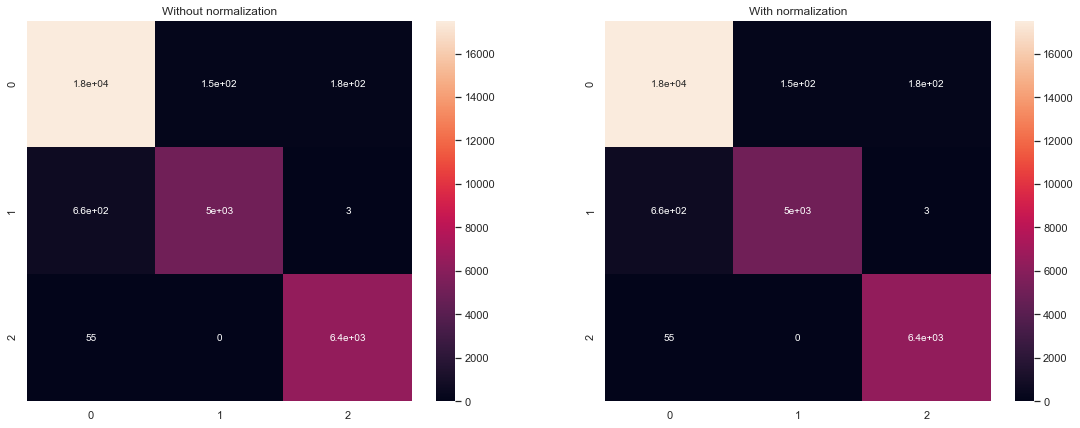

In [53]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(19,7))
plt.title("Confusion matrix for the Extremely randomized tree classifier")
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra), annot=True, annot_kws={"size": 10})
plt.title("Without normalization")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra_scaled), annot=True, annot_kws={"size": 10})
plt.title("With normalization")

#### SVM

In [ ]:
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm, average='macro'))

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix')